In [4]:
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
data = pd.read_csv("city_day.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


<Axes: >

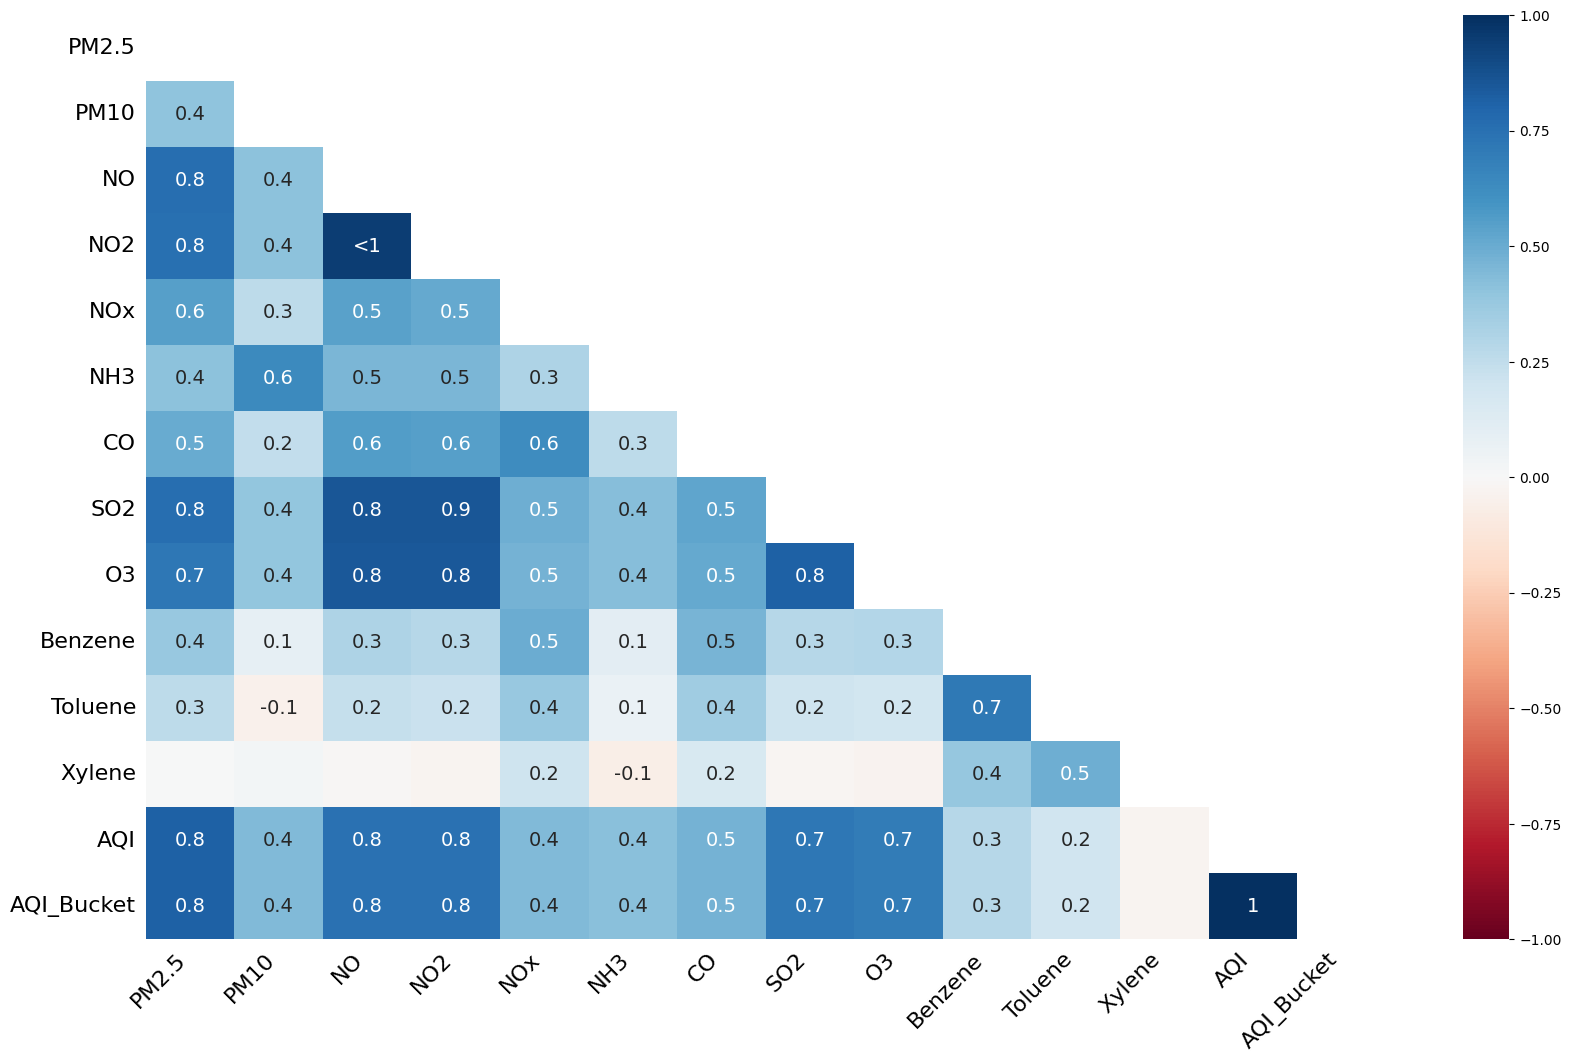

In [6]:
msno.heatmap(data)

In [9]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [10]:
df = df1.copy()
df = df[df['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  object        
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   AQI_Bucket                    24908 non-null  object        
 4   Vehicular Pollution content   24908 non-null  float64       
 5   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


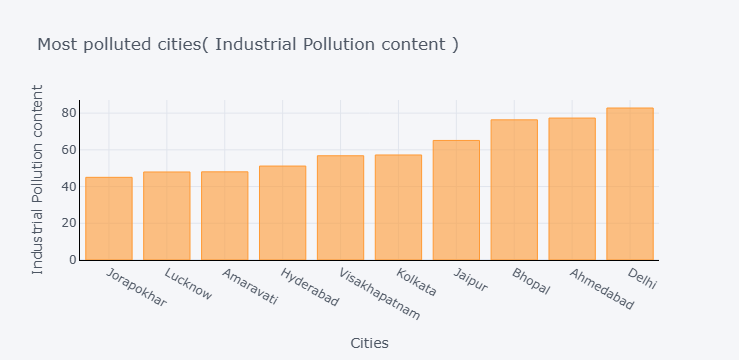

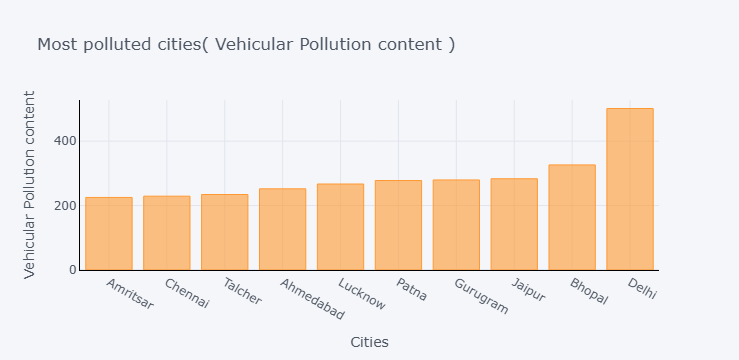

In [12]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

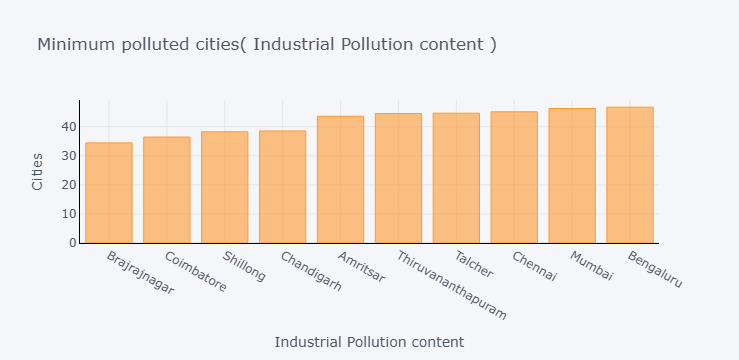

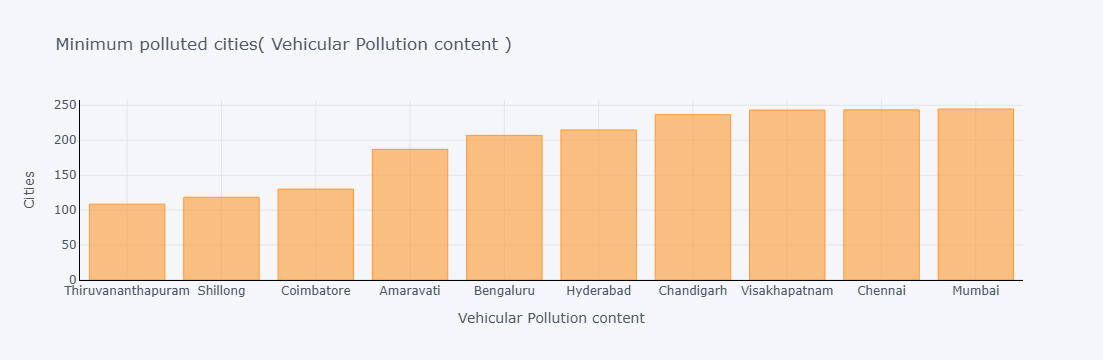

In [13]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

## Preprocessing 

In [15]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int32         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  int3

In [16]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,1.000000,0.096617,-0.210021,-0.239281,-0.178405,-0.263199,-0.222700,0.095620,-0.248016,-0.267015,-0.156189,-0.008906,-0.211290,-0.001101,-0.356620,-0.111163
Date,0.096617,1.000000,-0.166343,-0.071013,0.014388,-0.035685,0.000635,-0.116039,-0.058871,0.056035,-0.021524,0.039101,0.072059,0.055540,-0.127769,0.034379
PM2.5,-0.210021,-0.166343,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.087813,0.633654,0.408614
PM10,-0.239281,-0.071013,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.030257,0.447686,0.208080
NO,-0.178405,0.014388,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.084393,0.438039,0.259407
NO2,-0.263199,-0.035685,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.188965,0.531952,0.259199
NOx,-0.222700,0.000635,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.085447,0.436282,0.212592
NH3,0.095620,-0.116039,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,-0.030328,0.097916,0.077250
CO,-0.248016,-0.058871,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.181215,0.650475,0.215848
SO2,-0.267015,0.056035,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.249808,0.454182,0.170843


In [17]:
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 10749, 3: 6650, 2: 2203, 5: 1854, 4: 1089, 0: 1079})


#### Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({3: 10749, 1: 10749, 2: 10749, 4: 10749, 0: 10749, 5: 10749})


#### SVM

In [25]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 262    0    0    0    0    0]
 [   0 2652   50   59    0    0]
 [   0    0  566    0    0   12]
 [  81    1    0 1492    0    0]
 [   0    0    0    0  247    2]
 [   0    0    2    0    7  474]]


accuracy 96.37717961740309


#### Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 262    0    0    0    0    0]
 [   0 2761    0    0    0    0]
 [   0    1  577    0    0    0]
 [   0    1    0 1573    0    0]
 [   0    0    0    0  249    0]
 [   0    0    5    0    0  478]]


accuracy 99.88149652954122


#### XGB Classifier

In [27]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix
[[ 262    0    0    0    0    0]
 [   0 2722    0   39    0    0]
 [   0    0  557    0    0   21]
 [   0    0    0 1574    0    0]
 [   0    0    0    0  249    0]
 [   0    0    0    0    6  477]]


accuracy 98.88268156424581
